In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
x_1 = np.random.multivariate_normal([1,1], np.eye(2), size=100)
x_2 = np.random.multivariate_normal([5,5], np.eye(2), size=100)

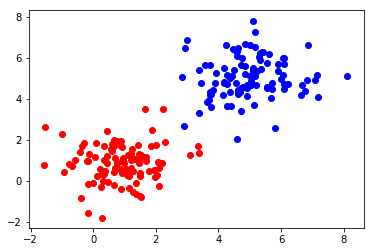

In [3]:
colors = ['r', 'b']
plt.scatter(x_1[:,0], x_1[:,1], c=colors[0])
plt.scatter(x_2[:,0], x_2[:,1], c=colors[1])

In [4]:
with tf.variable_scope('inp') as scope:
    inp_x_1 = tf.placeholder(tf.float32, shape=(None, 2))
    inp_x_2 = tf.placeholder(tf.float32, shape=(None, 2))

def log_reg(inp):
    return tf.layers.dense(inp, units=1, activation=tf.sigmoid, name='log_reg')

with tf.variable_scope('out') as scope:
    out_x_1 = log_reg(inp_x_1)
    scope.reuse_variables()
    out_x_2 = log_reg(inp_x_2)
    
with tf.variable_scope('loss'):
    log_likelihood = tf.reduce_mean(tf.log(out_x_1+1e-10) + tf.log(1-out_x_2+1e-10))
    loss = -log_likelihood

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
train_op = optimizer.minimize(loss)

100%|██████████| 10000/10000 [00:05<00:00, 1726.05it/s]


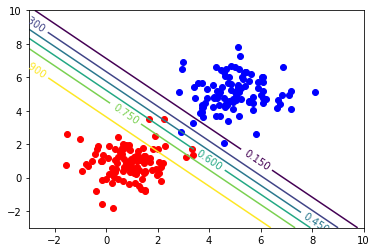

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in tqdm(range(int(1e+4))):
        sess.run(train_op, feed_dict={inp_x_1:x_1, inp_x_2:x_2})
        
    # make plot 
    x_line = np.linspace(-3, 10, 100)
    y_line = np.linspace(-3, 10, 100)
    X, Y = np.meshgrid(x_line, y_line)
    x_line = np.reshape(X, [-1])
    y_line = np.reshape(Y, [-1])
    inp_line = np.transpose(np.stack([x_line, y_line]))
    z = sess.run(out_x_1, feed_dict={inp_x_1:inp_line})
    Z = np.reshape(z, [100, 100])
    CS = plt.contour(X, Y, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.scatter(x_1[:,0], x_1[:,1], c=colors[0])
    plt.scatter(x_2[:,0], x_2[:,1], c=colors[1])